# Support Vector Machines

Create the same fake income / age clustered data that we used for our K-Means clustering example:

In [2]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    np.random.seed(1234)

    # find points per cluster given # of people and # of clusters
    pointsPerCluster = float(N)/k

    X = []
    y = []

    # for every cluster
    for i in range (k):

        # generate random mean (centroid) that data will be centered around
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)

        # for every point per cluster
        for j in range(int(pointsPerCluster)):

            # generate value and append to X feature array
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)

    # return data in numper array
    X = np.array(X)
    y = np.array(y)

    return X, y

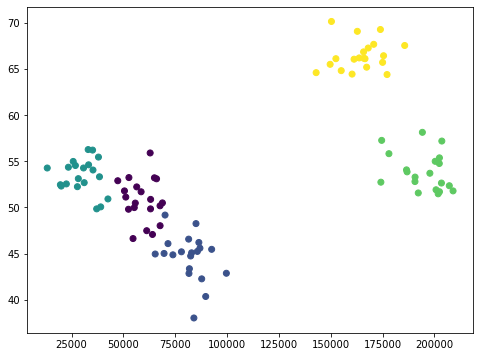

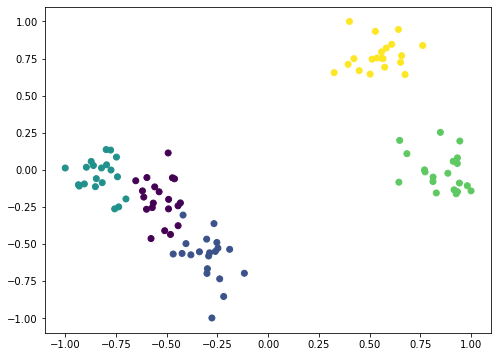

In [3]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

# generate clustered data
(X, y) = createClusteredData(100, 5)

# plot scatter plot of data points color coordinated as clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

# use MinMax scaler to scale data to range
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)

# fit all features in X array
X = scaling.transform(X)

# plot with new scale
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Use linear SVC to partition our graph into clusters:

In [4]:
from sklearn import svm, datasets

# default value
C = 1.0

# apply SVC, specify kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

By setting up a dense mesh of points in the grid and classifying all of them, can render the regions of each cluster as distinct colors:

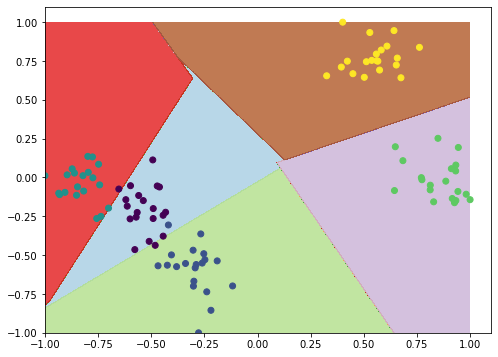

In [5]:
# visualize the ranges of ages/incomes that our model thinks correlates
def plotPredictions(clf):

    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))

    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()

    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]

    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points
    plt.show()

plotPredictions(svc)

Or just use predict for a given point:

In [6]:
print(svc.predict(scaling.transform([[200000, 40]])))

[3]


In [7]:
print(svc.predict(scaling.transform([[50000, 65]])))

[2]


Use different kernels:

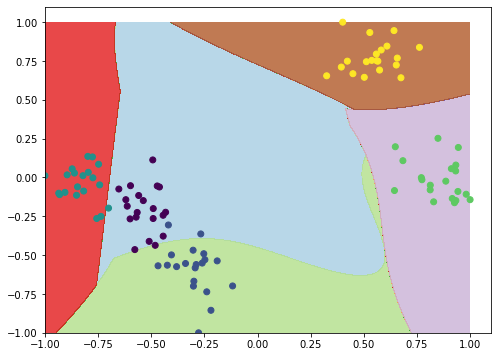

In [8]:
# apply SVC, specify kernel
svc = svm.SVC(kernel='poly', C=C).fit(X, y)

plotPredictions(svc)

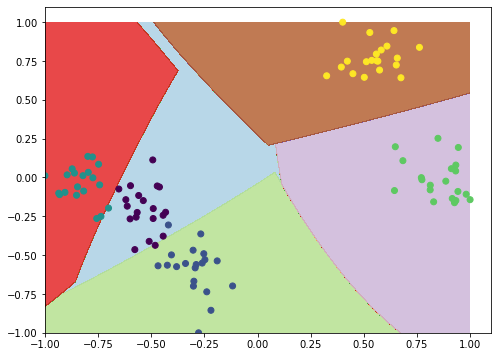

In [9]:
# apply SVC, specify kernel
svc = svm.SVC(kernel='rbf', C=C).fit(X, y)

plotPredictions(svc)

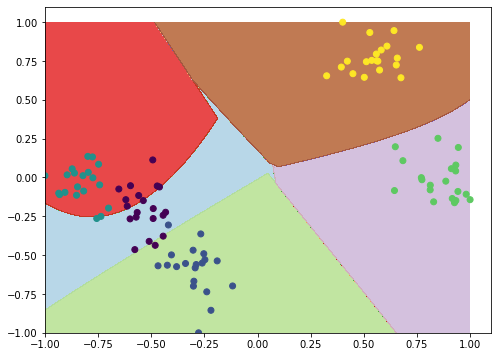

In [10]:
# apply SVC, specify kernel
svc = svm.SVC(kernel='sigmoid', C=C).fit(X, y)

plotPredictions(svc)